# Microsoft Stock Prediction

This project focuses on predicting Microsoft stock prices using linear regression techniques. The goal is to build a predictive model that can estimate future stock prices based on historical data, enabling informed investment decisions. The project involves data collection, preprocessing, exploratory data analysis (EDA), feature engineering, model training, evaluation, and visualization of results.

Data Collection: I used pdstock (A module i developed) to get stock price data for Microsoft from yfinance, covering various features such as opening price, closing price, high, low, and volume. Stock price data was generated for the past 5 years and further broken to the past 1 year September 01, 2023 to September 02, 2024 which was used for training and testing the model.

Data Preprocessing: I checked for null values in the dataframe but there was none. This shows the data can be worked on directly since there are no errors.

Exploratory Data Analysis (EDA): I created new features for 20 and 50 days moving avergae and performed EDA to detect patterns and identify relationships between features using correlation matrix.

Feature Engineering: Choosed relevant features and target variables for the linear regression model.

Model Training: I implemented and train a linear regression model using the processed data.

Model Evaluation: Assessed the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R²).

Visualization: Generated visualizations to present the model's predictions versus actual stock prices.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from pdstock.stock import stockdata
import matplotlib.pyplot as plt

In [2]:
df = stockdata('MSFT', 5)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-04,137.300003,137.690002,136.479996,137.630005,131.457291,17995900
1,2019-09-05,139.110001,140.380005,138.759995,140.050003,133.768692,26101800
2,2019-09-06,140.029999,140.179993,138.199997,139.100006,132.861359,20824500
3,2019-09-09,139.589996,139.750000,136.460007,137.520004,131.352203,25773900
4,2019-09-10,136.800003,136.889999,134.509995,136.080002,129.976807,28903400


In [3]:
# Check for null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
# make date the index
df = df.set_index('Date')

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-04,137.300003,137.690002,136.479996,137.630005,131.457291,17995900
2019-09-05,139.110001,140.380005,138.759995,140.050003,133.768692,26101800
2019-09-06,140.029999,140.179993,138.199997,139.100006,132.861359,20824500
2019-09-09,139.589996,139.750000,136.460007,137.520004,131.352203,25773900
2019-09-10,136.800003,136.889999,134.509995,136.080002,129.976807,28903400


In [5]:
# Create a 20 and 50 moving average variables

df['20_MA'] = df['Close'].rolling(window=20).mean()
df['50_MA'] = df['Close'].rolling(window=50).mean()


In [6]:
#select data range
import datetime as datetime
df_start = '2023-09-01'
df_end = datetime.datetime.now()

microsoft_df = df.loc[df_start:df_end]

microsoft_df

,Open,High,Low,Close,Adj Close,Volume,20_MA,50_MA
Date,,,,,,,,
2023-09-01,331.309998,331.989990,326.779999,328.660004,326.211395,14931200,323.680002,332.707000
2023-09-05,329.000000,334.850006,328.660004,333.549988,331.065002,18553900,323.852002,332.677599
2023-09-06,333.380005,334.459991,330.179993,332.880005,330.400024,17535800,324.193503,332.763199
2023-09-07,331.290009,333.079987,329.029999,329.910004,327.452148,18381000,324.577503,332.669999
2023-09-08,330.089996,336.160004,329.459991,334.269989,331.779633,19530100,325.144502,332.638399
...,...,...,...,...,...,...,...,...
2024-08-26,416.369995,417.279999,411.339996,413.489990,413.489990,13152800,413.112497,434.035599
2024-08-27,412.859985,414.359985,410.250000,413.839996,413.839996,13492900,412.658496,433.460998
2024-08-28,414.880005,415.000000,407.309998,410.600006,410.600006,14882700,412.270996,432.705599


In [7]:
# Analyze and visualize the trends 
fig = px.line(microsoft_df[['Close', '20_MA', '50_MA']], title='Stock Close Price and Moving Averages')


fig.show()

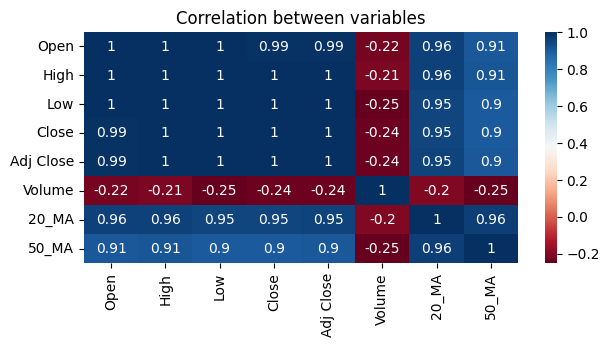

In [8]:
# Visualize relationship between variables
df_correlation = microsoft_df.corr()

plt.figure(figsize=[7,3])
sns.heatmap(df_correlation, annot=True, cmap='RdBu')
plt.title('Correlation between variables')

plt.show()

In [9]:
# Feature selection

X = microsoft_df.drop('Close', axis=1)
y = microsoft_df['Close']


In [10]:
# Data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
# Model selection
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#fit model
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score

#predict
y_pred = model.predict(X_test)

#Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2_Score: {r2_score}')

MSE: 0.2751914723552754
R2_Score: 0.9993413026256426


In [13]:
#Combine predicted price and actual price into a dataframe for visualization

combined_df = pd.DataFrame({
    'actual_price' : y_test,
    'predicted_price': y_pred
})

#Visualize
fig = px.line(combined_df, title='Actual vs Predicted Stock Price')

fig.show()

# Results of the Analysis
The analysis of Microsoft stock prices using linear regression yielded promising results, indicating that the model performs exceptionally well in predicting stock prices based on historical data. The key metrics from the analysis are as follows:

# R-squared Score
R-squared (R²) Score: 0.999
The R-squared score of 0.999 signifies an excellent fit of the linear regression model to the data. This high R² value indicates that the model explains 99.9% of the variance in the stock prices. Such a high score suggests that the model's predictions are very close to the actual stock prices, demonstrating its effectiveness in capturing the underlying patterns in the data.

# Mean Squared Error
Mean Squared Error (MSE): 0.27
The Mean Squared Error of 0.27 represents the average squared difference between the predicted and actual stock prices. Given the relatively small value of the MSE, this indicates that the model's predictions are very accurate, with only minor deviations from the actual prices. Lower MSE values generally imply better model performance, and in this case, the model demonstrates a high degree of precision.

# Summary
Overall, the linear regression model shows outstanding performance in predicting Microsoft stock prices, as evidenced by the very high R-squared score and low Mean Squared Error. These results suggest that the model is highly reliable for forecasting stock prices based on the historical data used. However, it is important to consider that while these metrics indicate strong performance, further validation with different datasets and more sophisticated models could provide additional insights and ensure robustness in various market conditions.

